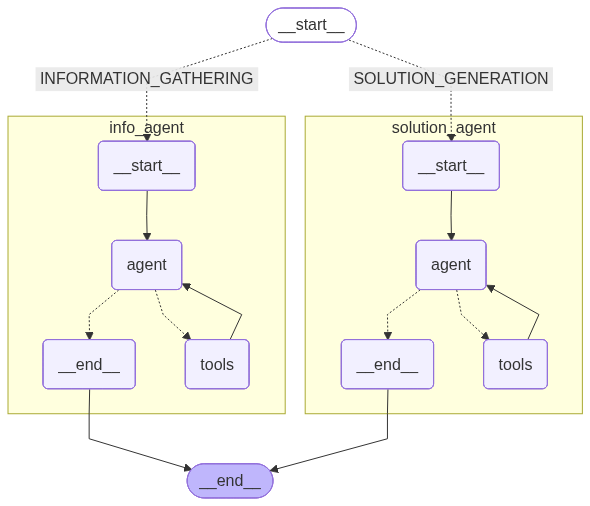

In [9]:
from costix.graph import CostixGraph
from langgraph.checkpoint.memory import MemorySaver
checkpoint=MemorySaver()

from IPython.display import display,Image

graph=CostixGraph(checkpointer=checkpoint)


display(Image(graph.graph.get_graph(xray=1).draw_mermaid_png()))


In [2]:
thread_id='2'
config={'configurable':{'thread_id':thread_id}}


In [3]:
import json
graph.graph.get_state(config).values

{}

In [4]:
# initialize the graph state

from langchain_core.messages import HumanMessage
from costix.schemas import CostixPhase

graph.initialize_thread(thread_id=thread_id)


In [5]:


user_input=input('Enter your message')



user_message=HumanMessage(content=user_input)
response=graph.invoke({'messages':[user_message]},config,debug=True)

ai_message=response['messages'][-1]
print('Ai Response:',ai_message.content)





[values] {'messages': [HumanMessage(content='testing', additional_kwargs={}, response_metadata={}, id='875bc2d8-6726-4c00-a42f-742805f09e57')], 'messages_history': [], 'current_phase': <CostixPhase.INFORMATION_GATHERING: 'INFORMATION_GATHERING'>, 'collected_data': [], 'uploaded_files': []}
[updates] {<CostixNodes.INFO_AGENT: 'info_agent'>: {'messages': [HumanMessage(content='testing', additional_kwargs={}, response_metadata={}, id='875bc2d8-6726-4c00-a42f-742805f09e57'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rg6DiVkfZ4UsUSygukmP56Hm', 'function': {'arguments': '{"question":{"title":"Welcome to the Cloud Project Cost Estimation Assistant!","subtitle":"To get started, what type of cloud project are you planning?","type":"single_select","options":["New Application Deployment","Migration of Existing Systems","Hybrid (On-Prem + Cloud)","Data Analytics/Big Data","Machine Learning/AI","Disaster Recovery/Backup","Other"]}}', 'name': 'ask_question'}, 'type': 'func

In [6]:
response

{'messages': [HumanMessage(content='testing', additional_kwargs={}, response_metadata={}, id='875bc2d8-6726-4c00-a42f-742805f09e57'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rg6DiVkfZ4UsUSygukmP56Hm', 'function': {'arguments': '{"question":{"title":"Welcome to the Cloud Project Cost Estimation Assistant!","subtitle":"To get started, what type of cloud project are you planning?","type":"single_select","options":["New Application Deployment","Migration of Existing Systems","Hybrid (On-Prem + Cloud)","Data Analytics/Big Data","Machine Learning/AI","Disaster Recovery/Backup","Other"]}}', 'name': 'ask_question'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 494, 'total_tokens': 580, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'mod

In [7]:
from costix.agents import get_info_agent

from costix.model import get_model



info_agent=get_info_agent(get_model())

In [8]:
from langgraph.prebuilt import create_react_agent

